# Notebook pour les différents évaluations des modèles

In [1]:
import outils as os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [3]:
list_name = ['Can', 'Organic', 'Plastic', 'Textile', 'Glass']

In [4]:
df_test = os.Load_data()

In [5]:
df_test = os.Load_data().load_object("data_local.zip")

In [6]:
df_test.encodage()

In [7]:
(X_train,y_train),(X_test_t,y_test_t) = df_test.create_data(test_size=0.99)

In [8]:
X_test_t = X_test_t / 255

In [9]:
df_train = os.Load_data().load_object("dataset2.zip")

In [10]:
df_train.encodage()

In [11]:
(_,_),(X_test_tr,y_test_tr) = df_train.create_data(test_size=0.2)

In [12]:
X_test_tr = X_test_tr / 255.

In [13]:
model_n_13 = load_model("model_cls_n_13.keras")

In [14]:
model_n_14 = load_model("model_cls_n_14.keras")

In [15]:
model_13 = load_model("model_cls_13.keras")

In [16]:
model_14 = load_model("model_cls_14.keras")

In [17]:
predict_proba = model_13.predict(X_test_tr)
y_pred_test_model1= np.argmax(predict_proba, axis=1)

76/76 ━━━━━━━━━━━━━━━━━━━━ 29s 353ms/step


In [18]:
predict_proba = model_14.predict(X_test_tr)
y_pred_test_model2 = np.argmax(predict_proba, axis=1)

76/76 ━━━━━━━━━━━━━━━━━━━━ 29s 357ms/step


In [19]:
predict_proba = model_n_13.predict(X_test_t)
y_pred_local_model1 = np.argmax(predict_proba, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 359ms/step


In [20]:
predict_proba = model_n_14.predict(X_test_t)
y_pred_local_model2 = np.argmax(predict_proba, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 351ms/step


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 328ms/step
========================================== Confusion Matrix =====================================================
[[126   2   1   0   0]
 [  7  93   1   2   2]
 [  7   6 127  18  12]
 [  0   4   6  64   2]
 [  8   6   9   1  57]]


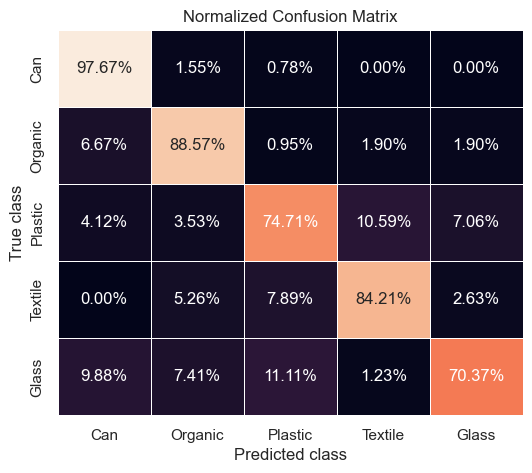

========================================= Detailed Metrics =====================================================
              precision    recall  f1-score   support

         Can     0.8514    0.9767    0.9097       129
     Organic     0.8378    0.8857    0.8611       105
     Plastic     0.8819    0.7471    0.8089       170
     Textile     0.7529    0.8421    0.7950        76
       Glass     0.7808    0.7037    0.7403        81

    accuracy                         0.8324       561
   macro avg     0.8210    0.8311    0.8230       561
weighted avg     0.8346    0.8324    0.8301       561

Macro F1-score (unweighted): 0.8230
Weighted F1-score: 0.8301


In [21]:
y_pres_model_13 = os.evaluation(model=model_n_13,X_test=X_test_t,y_test=y_test_t,labels=list_name)

18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 330ms/step
========================================== Confusion Matrix =====================================================
[[126   2   1   0   0]
 [  7  93   1   2   2]
 [  7   6 127  18  12]
 [  0   4   6  64   2]
 [  8   6   9   1  57]]


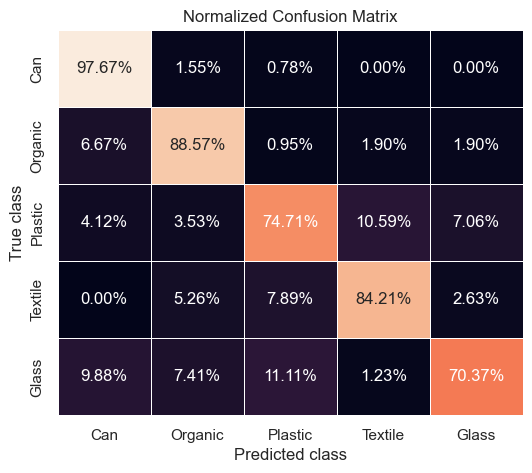

========================================= Detailed Metrics =====================================================
              precision    recall  f1-score   support

         Can     0.8514    0.9767    0.9097       129
     Organic     0.8378    0.8857    0.8611       105
     Plastic     0.8819    0.7471    0.8089       170
     Textile     0.7529    0.8421    0.7950        76
       Glass     0.7808    0.7037    0.7403        81

    accuracy                         0.8324       561
   macro avg     0.8210    0.8311    0.8230       561
weighted avg     0.8346    0.8324    0.8301       561

Macro F1-score (unweighted): 0.8230
Weighted F1-score: 0.8301


In [22]:
y_pres_model_14 = os.evaluation(model=model_n_13,X_test=X_test_t,y_test=y_test_t,labels=list_name)

In [23]:
np.unique(y_test_t,return_counts=True)

(array([0, 1, 2, 3, 4]), array([129, 105, 170,  76,  81], dtype=int64))

In [24]:
df_anomalie = os.Load_data.load_object("detect_anomalie.zip")

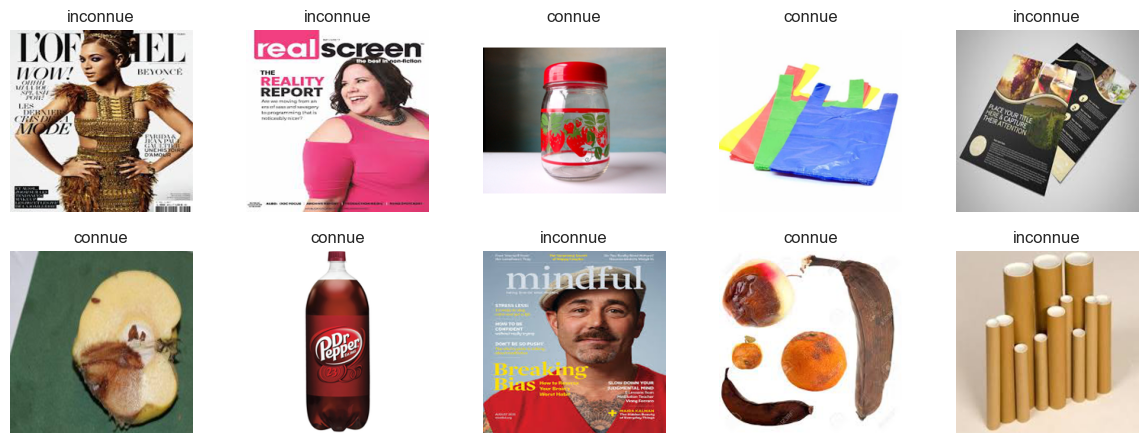

In [25]:
df_anomalie.plot(view_code=True)

In [26]:
df_anomalie.encodage()

In [27]:
(X_test_an, y_test_an), (_,_) = df_anomalie.create_data(test_size=0.00000001)

In [28]:
X_test_an = X_test_an.astype('float32') / 255.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def eval_with_thresholds(model, X_test, y_test, thresholds):
    probs = model.predict(X_test, verbose=0)  
    if probs.ndim > 1:  
        conf = np.max(probs, axis=1)  # softmax
    else:
        conf = probs  # binaire

    results = {}
    for t in thresholds:
        y_pred = (conf < t).astype(int)

        connus_detectes   = np.sum((y_test == 0) & (y_pred == 0))
        inconnus_detectes = np.sum((y_test == 1) & (y_pred == 1))
        acc = accuracy_score(y_test, y_pred)

        results[t] = {
            "connus_detectes": int(connus_detectes),
            "inconnus_detectes": int(inconnus_detectes),
            "accuracy": acc
        }

    return results


def plot_results(results):
    seuils = list(results.keys())
    connus = [r["connus_detectes"] for r in results.values()]
    inconnus = [r["inconnus_detectes"] for r in results.values()]
    accs = [r["accuracy"] for r in results.values()]

    fig, ax1 = plt.subplots(figsize=(10,6))

    # Axe Y gauche → nombres d’images
    ax1.plot(seuils, connus, label="Connus détectés", marker="o")
    ax1.plot(seuils, inconnus, label="Inconnus détectés", marker="s")
    ax1.set_xlabel("Seuil de confiance")
    ax1.set_ylabel("Nombre d'images détectées")
    ax1.grid(True)
    # Fusion des légendes
    lines, labels = ax1.get_legend_handles_labels()
    #lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines , labels , loc="best")

    plt.title("Évolution des détections selon le seuil")
    plt.show()

    # Meilleur seuil selon accuracy
    best_seuil = seuils[np.argmax(accs)]
    print(f"Meilleur seuil : {best_seuil:.3f} (accuracy = {max(accs):.4f})")

    return best_seuil

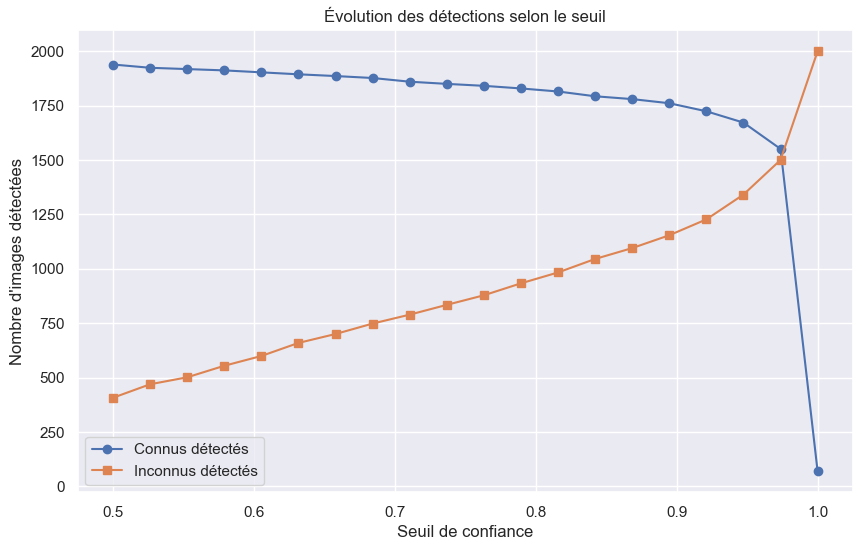

Meilleur seuil : 0.974 (accuracy = 0.7629)


In [30]:
thresholds = np.linspace(0.5, 1, 20)   # 20 seuils entre 0.5 et 0
results = eval_with_thresholds(model_n_14, X_test_an, y_test_an, thresholds)
best_seuil = plot_results(results)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, Tuple
def compare_models(y_true_test: np.ndarray,
                   y_pred_test_model1: np.ndarray,
                   y_pred_test_model2: np.ndarray,
                   y_true_local: np.ndarray,
                   y_pred_local_model1: np.ndarray,
                   y_pred_local_model2: np.ndarray) -> Dict[str, Tuple[float, float]]:
   

    results: Dict[str, Tuple[float, float]] = {}

    # --- Jeu de test ---
    acc_test_m1 = np.mean(y_true_test == y_pred_test_model1) * 100
    acc_test_m2 = np.mean(y_true_test == y_pred_test_model2) * 100
    results["Test_Model1"] = (acc_test_m1, 100 - acc_test_m1)
    results["Test_Model2"] = (acc_test_m2, 100 - acc_test_m2)

    # --- Données locales ---
    acc_local_m1 = np.mean(y_true_local == y_pred_local_model1) * 100
    acc_local_m2 = np.mean(y_true_local == y_pred_local_model2) * 100
    results["Local_Model1"] = (acc_local_m1, 100 - acc_local_m1)
    results["Local_Model2"] = (acc_local_m2, 100 - acc_local_m2)

    # --- Tracé comparatif ---
    labels = list(results.keys())
    correct = [val[0] for val in results.values()]
    incorrect = [val[1] for val in results.values()]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x - width/2, correct, width, label="Bien classé (%)")
    bars2 = ax.bar(x + width/2, incorrect, width, label="Mal classé (%)")

    ax.set_ylabel("Pourcentage (%)")
    ax.set_title("Comparaison des performances des modèles")
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=20)
    ax.legend()
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    # Affichage des valeurs sur les barres
    for bars in (bars1, bars2):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f"{height:.2f}",
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha="center", va="bottom", fontsize=9)
    plt.savefig("comp.png")
    plt.tight_layout()
    plt.show()
    return results

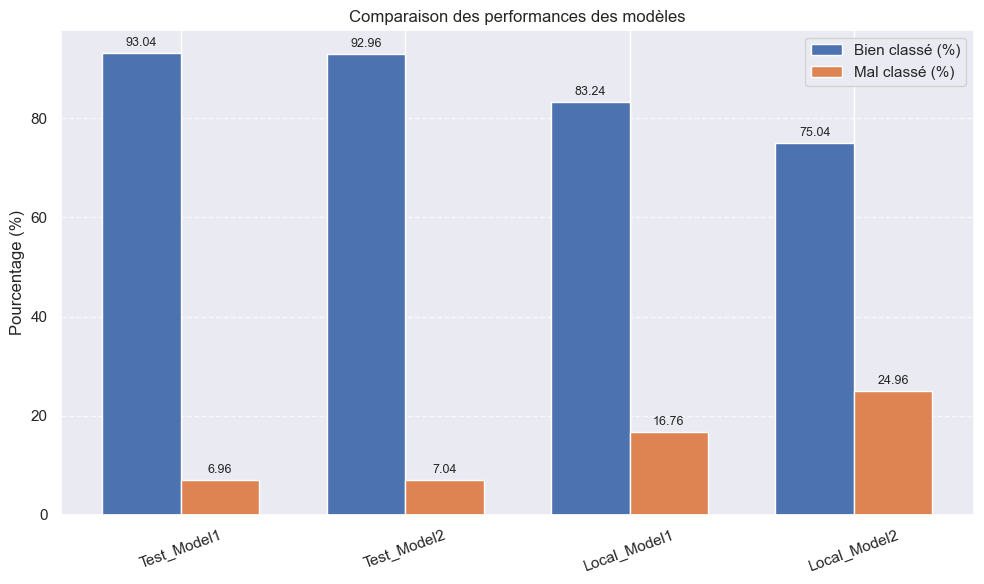

In [32]:
results = compare_models(y_test_tr, y_pred_test_model1, y_pred_test_model2,
                         y_test_t, y_pred_local_model1, y_pred_local_model2)

In [33]:
results

{'Test_Model1': (93.03953871499176, 6.960461285008236),
 'Test_Model2': (92.95716639209226, 7.042833607907738),
 'Local_Model1': (83.24420677361853, 16.75579322638147),
 'Local_Model2': (75.0445632798574, 24.9554367201426)}

In [34]:
import numpy as np
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

def compare_models_full(model1, model2, X_test, y_test, class_names):
    def evaluate_model(model, X, y_true):
        start = time.time()
        y_prob = model.predict(X)
        end = time.time()
        y_pred = np.argmax(y_prob, axis=1)
        total_time = end - start
        fps = len(X) / total_time

        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='macro')
        report = classification_report(y_true, y_pred, target_names=class_names, digits=4)
        conf_matrix = confusion_matrix(y_true, y_pred)

        return {
            'acc': acc,
            'f1': f1,
            'fps': fps,
            'time': total_time,
            'y_pred': y_pred,
            'report': report,
            'conf_matrix': conf_matrix,
            'params': model.count_params()
        }

    res1 = evaluate_model(model1, X_test, y_test)
    res2 = evaluate_model(model2, X_test, y_test)

    # --- Impression détaillée
    print("==========  Détails - Modèle 1 ==========")
    print(res1['report'])
    print(f"Total params : {res1['params']}")
    print(f"Accuracy : {res1['acc']:.4f} | F1-macro : {res1['f1']:.4f}")
    print(f"Prediction time : {res1['time']:.2f}s | FPS : {res1['fps']:.2f}")

    print("\n==========  Détails - Modèle 2 ==========")
    print(res2['report'])
    print(f"Total params : {res2['params']}")
    print(f"Accuracy : {res2['acc']:.4f} | F1-macro : {res2['f1']:.4f}")
    print(f"Prediction time : {res2['time']:.2f}s | FPS : {res2['fps']:.2f}")

    # --- Matrices de confusion
    fig, axs = plt.subplots(1, 2, c))
    sns.heatmap(res1['conf_matrix'].astype('float') / res1['conf_matrix'].sum(axis=1)[:, np.newaxis],
                annot=True, fmt=".2%", xticklabels=class_names, yticklabels=class_names,
                ax=axs[0], cmap="Blues")
    axs[0].set_title("Confusion Matrix - Model 1")

    sns.heatmap(res2['conf_matrix'].astype('float') / res2['conf_matrix'].sum(axis=1)[:, np.newaxis],
                annot=True, fmt=".2%", xticklabels=class_names, yticklabels=class_names,
                ax=axs[1], cmap="Greens")
    axs[1].set_title("Confusion Matrix - Model 2")
    plt.tight_layout()
    plt.show()

    # --- Résumé comparatif
    print("\n==========  Résumé comparatif ==========")
    print(f"{'':<18} | {'Model 1':<12} | {'Model 2':<12}")
    print(f"{'Accuracy':<18} | {res1['acc']:<12.4f} | {res2['acc']:<12.4f}")
    print(f"{'Macro F1-score':<18} | {res1['f1']:<12.4f} | {res2['f1']:<12.4f}")
    print(f"{'Params':<18} | {res1['params']:<12} | {res2['params']:<12}")
    print(f"{'Time (s)':<18} | {res1['time']:<12.2f} | {res2['time']:<12.2f}")
    print(f"{'FPS':<18} | {res1['fps']:<12.2f} | {res2['fps']:<12.2f}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 461ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 437ms/step
==========  Détails - Modèle 1 ==========
              precision    recall  f1-score   support

         Can     0.8514    0.9767    0.9097       129
     Organic     0.8378    0.8857    0.8611       105
     Plastic     0.8819    0.7471    0.8089       170
     Textile     0.7529    0.8421    0.7950        76
       Glass     0.7808    0.7037    0.7403        81

    accuracy                         0.8324       561
   macro avg     0.8210    0.8311    0.8230       561
weighted avg     0.8346    0.8324    0.8301       561

Total params : 4050393
Accuracy : 0.8324 | F1-macro : 0.8230
Prediction time : 16.17s | FPS : 34.70

==========  Détails - Modèle 2 ==========
              precision    recall  f1-score   support

         Can     0.8881    0.9225    0.9049       129
     Organic     0.6525    0.7333    0.6906       105
     Plastic     0.8141    0.7471    0.7791       170
     Textile     0.6714   

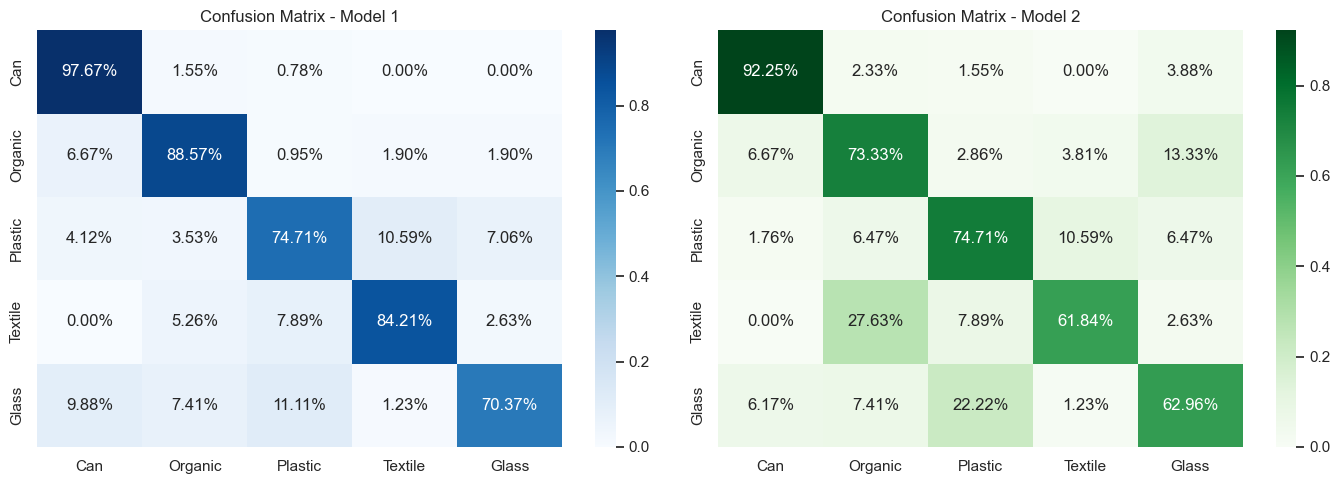


==========  Résumé comparatif ==========
                   | Model 1      | Model 2     
Accuracy           | 0.8324       | 0.7504      
Macro F1-score     | 0.8230       | 0.7281      
Params             | 4050393      | 806361      
Time (s)           | 16.17        | 9.14        
FPS                | 34.70        | 61.40       


In [71]:
class_names = ['Can', 'Organic', 'Plastic', 'Textile', 'Glass']
compare_models_full(model_n_13, model_n_14, X_test_t,y_test_t, class_names)